<table>
    <tr>
        <td>
            <img src="https://avatars.githubusercontent.com/u/123472619?v=4" alt="Descrição da Imagem" style="width:200px;"/>
        </td>
        <td>
            <p>
                <h6 style="font-size:20px;">Author: William Sousa</h6>
                <h6 style="font-size:20px;">Github: <a href="https://github.com/williamsousab">https://github.com/williamsousab</a></h6>
                <h6 style="font-size:20px;">Linkedin: <a href="https://www.linkedin.com/in/williamsousab">https://www.linkedin.com/in/williamsousab</a></h6>
            </p>
        </td>
    </tr>
</table>

## Treinamento YoloV8 Identificando Rosto

###### Link Colab: https://colab.research.google.com/drive/1anZpirGn4SbU4ADdYyWOp1w3aRNv3Gr2?usp=sharing#scrollTo=U8gSP7fsbgDY

### Realizando o Donwload dos Arquivos Necessários

In [5]:
!git clone https://github.com/williamsousab/Yolo_V8_Face_Jupyter.git

Cloning into 'Yolo_V8_Face_Jupyter'...


In [6]:
cd Yolo_V8_Face_Jupyter/

C:\Treinamento_YoloV8_Face\Yolo_V8_Face_Jupyter


C:\Users\William Sousa\anaconda3\envs\gpu_env\Lib\site-packages\IPython\core\magics\osm.py:417: UserWarning: This is now an optional IPython functionality, setting dhist requires you to install the `pickleshare` library.
  self.shell.db['dhist'] = compress_dhist(dhist)[-100:]


In [7]:
import zipfile

# Caminho para o arquivo .zip
zip_path = 'datasets.zip'

# Caminho para o diretório onde os arquivos serão descompactados
extract_path = './datasets/'

with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_path)

print("Arquivos descompactados com sucesso!")

Arquivos descompactados com sucesso!


### Instalação do Ultralytics

In [ ]:
#pip install ultralytics

### Verificar se está usando a GPU

In [8]:
import torch
print(torch.__version__)

print("GPU Configurada:", torch.cuda.is_available())
print("Total de GPUs", torch.cuda.device_count())

if torch.cuda.is_available():
    print("GPU Atual:", torch.cuda.current_device())
    print("Device", torch.cuda.device(0))
    print("Device Name", torch.cuda.get_device_name(0))
else:
    print("Nenhuma GPU configurada")

2.5.1+cu124
GPU Configurada: True
Total de GPUs 1
GPU Atual: 0
Device <torch.cuda.device object at 0x000001E00702BC50>
Device Name NVIDIA GeForce GTX 1050 Ti


### Realizando o Treinamento

In [10]:
from ultralytics import YOLO

def main():
    # Carregar o modelo
    model = YOLO("yolov8n.pt")

    # Usar o modelo
    model.train(data="vingadores.yaml", epochs=30, device=0)
    metrics = model.val()  # avaliar o desempenho do modelo no conjunto de validação
    # results = model("https://ultralytics.com/images/bus.jpg")  # prever em uma imagem
    # path = model.export(format="onnx")  # exportar o modelo para o formato ONNX
    # print("path", path)

if __name__ == '__main__':
    main()

Ultralytics 8.3.63  Python-3.12.8 torch-2.5.1+cu124 CUDA:0 (NVIDIA GeForce GTX 1050 Ti, 4096MiB)
engine\trainer: task=detect, mode=train, model=yolov8n.pt, data=vingadores.yaml, epochs=30, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=0, workers=8, project=None, name=train2, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, show_box

100%|█████████████████████████████████████████████████████████████████████████████| 5.35M/5.35M [00:00<00:00, 53.5MB/s]


AMP: checks passed 


train: Scanning C:\Treinamento_YoloV8_Face\Yolo_V8_Face_Jupyter\datasets\datasets\vingadores\train... 325 images, 0 bac


train: New cache created: C:\Treinamento_YoloV8_Face\Yolo_V8_Face_Jupyter\datasets\datasets\vingadores\train.cache


val: Scanning C:\Treinamento_YoloV8_Face\Yolo_V8_Face_Jupyter\datasets\datasets\vingadores\val... 80 images, 0 backgrou


val: New cache created: C:\Treinamento_YoloV8_Face\Yolo_V8_Face_Jupyter\datasets\datasets\vingadores\val.cache
Plotting labels to runs\detect\train2\labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.000833, momentum=0.9) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.0005), 63 bias(decay=0.0)
TensorBoard: model graph visualization added 
Image sizes 640 train, 640 val
Using 4 dataloader workers
Logging results to runs\detect\train2
Starting training for 30 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/30      2.42G      1.837      4.247      1.841         10        640: 100%|██████████| 21/21 [00:17<00:00,  1.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:04<0

                   all         80        129    0.00447      0.709      0.145     0.0896



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/30      2.36G      1.565      3.488      1.608         22        640: 100%|██████████| 21/21 [00:13<00:00,  1.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<0

                   all         80        129    0.00543      0.784      0.214       0.13



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/30      2.38G      1.508      2.905      1.568         13        640: 100%|██████████| 21/21 [00:12<00:00,  1.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<0

                   all         80        129    0.00578      0.833      0.186     0.0773



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/30      2.38G      1.505      2.716      1.504         15        640: 100%|██████████| 21/21 [00:13<00:00,  1.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<0

                   all         80        129      0.313      0.231      0.246      0.101



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/30      2.36G      1.477      2.592      1.477         22        640: 100%|██████████| 21/21 [00:12<00:00,  1.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<0

                   all         80        129       0.46      0.406      0.374      0.199



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/30      2.38G      1.471      2.327      1.518         24        640: 100%|██████████| 21/21 [00:12<00:00,  1.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<0

                   all         80        129      0.498       0.49      0.484      0.261



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/30      2.37G      1.456      2.191      1.484         18        640: 100%|██████████| 21/21 [00:12<00:00,  1.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:02<0

                   all         80        129      0.491      0.489      0.533      0.286



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/30      2.38G      1.371      2.055      1.445         22        640: 100%|██████████| 21/21 [00:12<00:00,  1.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<0

                   all         80        129      0.574       0.52      0.587      0.313



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/30      2.36G      1.378      1.985      1.436         14        640: 100%|██████████| 21/21 [00:12<00:00,  1.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<0

                   all         80        129      0.535      0.497      0.545      0.294



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/30      2.38G      1.357      1.917      1.422         26        640: 100%|██████████| 21/21 [00:12<00:00,  1.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<0

                   all         80        129      0.491       0.44      0.452      0.241



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/30      2.37G      1.315      1.784      1.396         20        640: 100%|██████████| 21/21 [00:12<00:00,  1.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<0

                   all         80        129       0.71      0.601       0.66      0.365



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/30      2.38G      1.327      1.764      1.392         18        640: 100%|██████████| 21/21 [00:12<00:00,  1.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<0

                   all         80        129       0.72      0.633      0.681      0.352



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/30      2.36G      1.291       1.65      1.385         22        640: 100%|██████████| 21/21 [00:12<00:00,  1.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<0

                   all         80        129      0.797      0.588      0.717      0.372



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/30      2.42G      1.269      1.579      1.347         15        640: 100%|██████████| 21/21 [00:12<00:00,  1.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<0

                   all         80        129      0.717      0.699      0.743      0.382



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/30      2.37G      1.237      1.536      1.325         21        640: 100%|██████████| 21/21 [00:12<00:00,  1.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<0

                   all         80        129      0.649      0.673      0.727      0.383



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      16/30      2.38G      1.227      1.495      1.304         14        640: 100%|██████████| 21/21 [00:13<00:00,  1.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<0

                   all         80        129      0.794      0.739      0.791      0.456



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      17/30      2.37G      1.213      1.464       1.32         16        640: 100%|██████████| 21/21 [00:12<00:00,  1.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<0

                   all         80        129       0.79      0.686      0.765      0.402



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      18/30      2.38G      1.177      1.347      1.293         14        640: 100%|██████████| 21/21 [00:12<00:00,  1.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<0

                   all         80        129      0.798      0.707      0.803      0.441



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      19/30      2.37G      1.161      1.348      1.264         24        640: 100%|██████████| 21/21 [00:13<00:00,  1.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<0

                   all         80        129      0.795      0.718      0.784      0.426



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      20/30      2.37G      1.177      1.326      1.262         22        640: 100%|██████████| 21/21 [00:13<00:00,  1.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<0

                   all         80        129       0.78      0.698      0.757      0.402


Closing dataloader mosaic

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      21/30      2.36G      1.204      1.559      1.303          8        640: 100%|██████████| 21/21 [00:13<00:00,  1.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<0

                   all         80        129      0.681      0.654      0.735      0.423



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      22/30      2.38G      1.136       1.46       1.28          8        640: 100%|██████████| 21/21 [00:13<00:00,  1.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<0

                   all         80        129      0.779       0.69      0.779      0.436



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      23/30      2.37G      1.099      1.415       1.27          9        640: 100%|██████████| 21/21 [00:13<00:00,  1.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<0

                   all         80        129       0.77      0.708      0.776      0.414



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      24/30      2.38G      1.042      1.296      1.217         10        640: 100%|██████████| 21/21 [00:13<00:00,  1.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<0

                   all         80        129      0.769      0.752      0.784      0.423



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      25/30      2.37G      1.014      1.265      1.186         13        640: 100%|██████████| 21/21 [00:13<00:00,  1.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<0

                   all         80        129      0.826      0.689      0.785      0.439



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      26/30      2.38G      1.006      1.255       1.16         12        640: 100%|██████████| 21/21 [00:13<00:00,  1.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<0

                   all         80        129      0.848      0.715      0.779      0.425



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      27/30      2.37G     0.9671      1.215      1.157          6        640: 100%|██████████| 21/21 [00:13<00:00,  1.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<0

                   all         80        129      0.839      0.746      0.798      0.456



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      28/30      2.37G     0.9605      1.205      1.155          6        640: 100%|██████████| 21/21 [00:13<00:00,  1.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<0

                   all         80        129      0.788      0.736      0.788      0.433



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      29/30      2.36G     0.9661      1.202      1.163         10        640: 100%|██████████| 21/21 [00:13<00:00,  1.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<0

                   all         80        129      0.801       0.76      0.815      0.461



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      30/30      2.42G     0.9412      1.157      1.146          8        640: 100%|██████████| 21/21 [00:13<00:00,  1.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<0

                   all         80        129       0.82      0.745      0.824      0.464



30 epochs completed in 0.163 hours.
Optimizer stripped from runs\detect\train2\weights\last.pt, 6.2MB
Optimizer stripped from runs\detect\train2\weights\best.pt, 6.2MB

Validating runs\detect\train2\weights\best.pt...
Ultralytics 8.3.63  Python-3.12.8 torch-2.5.1+cu124 CUDA:0 (NVIDIA GeForce GTX 1050 Ti, 4096MiB)
Model summary (fused): 168 layers, 3,007,208 parameters, 0 gradients, 8.1 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:02<0


                   all         80        129       0.82      0.745      0.822      0.462
       Captain America         25         25      0.996       0.88      0.937      0.455
               Hawkeye         14         14      0.793      0.857      0.838      0.254
           Black Widow         19         19      0.912      0.737       0.91      0.559
                  Hulk          9          9      0.633      0.667      0.734      0.347
                  Thor         24         25      0.952        0.8      0.854      0.516
          Cap's Shield          8          8      0.788      0.935      0.971      0.809
                Mjonir          7          7      0.639      0.571       0.59      0.507
              Iron Man         21         22      0.849      0.511      0.739      0.251
Speed: 1.1ms preprocess, 6.3ms inference, 0.0ms loss, 4.0ms postprocess per image
Results saved to runs\detect\train2
Ultralytics 8.3.63  Python-3.12.8 torch-2.5.1+cu124 CUDA:0 (NVIDIA GeForce GTX 10

val: Scanning C:\Treinamento_YoloV8_Face\Yolo_V8_Face_Jupyter\datasets\datasets\vingadores\val.cache... 80 images, 0 ba
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:18<0


                   all         80        129      0.821      0.745      0.823      0.464
       Captain America         25         25      0.996       0.88      0.938      0.456
               Hawkeye         14         14       0.79      0.857      0.831      0.254
           Black Widow         19         19      0.912      0.737       0.91       0.56
                  Hulk          9          9      0.641      0.667      0.756       0.36
                  Thor         24         25      0.951        0.8      0.854      0.517
          Cap's Shield          8          8      0.789      0.935      0.971      0.809
                Mjonir          7          7      0.639      0.571       0.59      0.508
              Iron Man         21         22      0.849      0.511      0.736      0.251
Speed: 1.4ms preprocess, 9.5ms inference, 0.1ms loss, 6.0ms postprocess per image
Results saved to runs\detect\train22


### Testando a Aprendizagem

Verificar qual pasta ficou o arquivo "best.pt", pegar o caminho editar no código.

In [12]:
from PIL import Image
from ultralytics import YOLO

# Carregar um modelo YOLOv8n pré-treinado
model = YOLO(r"C:\Treinamento_YoloV8_Face\Yolo_V8_Face_Jupyter\runs\detect\train2\weights\best.pt")

# Executar inferência em 'image.jpg'
results = model([r"C:\Treinamento_YoloV8_Face\Yolo_V8_Face_Jupyter\image.jpg"])  # lista de resultados

# Visualizar os resultados
for i, r in enumerate(results):
    # Plotar imagem dos resultados
    im_bgr = r.plot()  # array numpy na ordem BGR
    im_rgb = Image.fromarray(im_bgr[..., ::-1])  # imagem PIL na ordem RGB

    # Salvar resultados no disco
    r.save(filename=f"results{i}.jpg")


0: 416x640 1 Captain America, 1 Hawkeye, 1 Black Widow, 1 Hulk, 1 Thor, 1 Iron Man, 53.7ms
Speed: 5.6ms preprocess, 53.7ms inference, 2.0ms postprocess per image at shape (1, 3, 416, 640)


### Mostrar Imagem

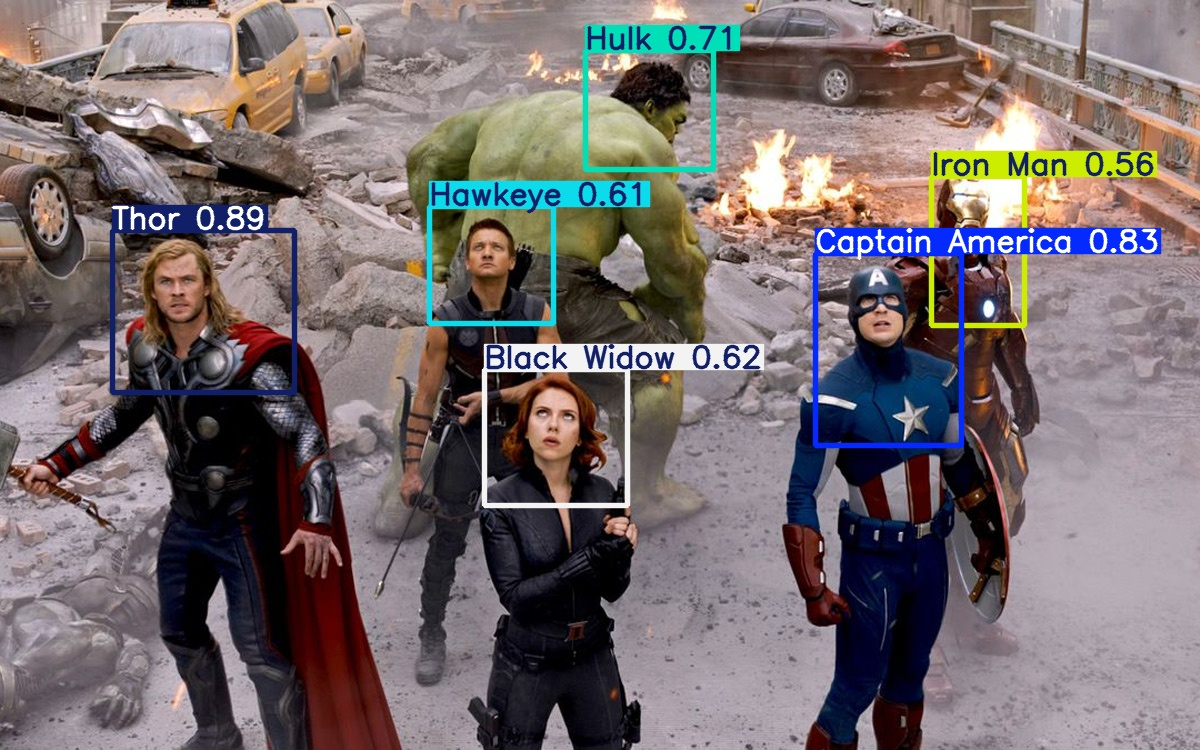

In [14]:
# Show results to screen (in supported environments)
img = Image.open('C:/Treinamento_YoloV8_Face/Yolo_V8_Face_Jupyter/results0.jpg')
img